In [2]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chandradyep","key":"038ec8f9cbf93ff622d6e87238d7f5d3"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dog-breed-identification

 99% 684M/691M [00:07<00:00, 104MB/s]
100% 691M/691M [00:07<00:00, 92.6MB/s]


In [ ]:
! unzip dog-breed-identification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: train/83fad0718581a696132c96c166472627.jpg  
  inflating: train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: train/840db91ba4600148f3dcb06ec419b421.jpg  
  inflating: train/840dbad5a691c22611d85b2488bf4cbb.jpg  
  inflating: train/8410ced9ebc1759a7ebce5c42bfb5222.jpg  
  inflating: train/84

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
!pip install torchvision

In [1]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 16

# list all transformations
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/dog/train', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/dog/test', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)


# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()

# get some random training images
#dataiter = iter(trainloader)
##images, labels = dataiter.next()

dataiter = iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

N_STEPS = 28
N_INPUTS = 28
N_NEURONS = 150
N_OUTPUTS = 20
N_EPHOCS = 50

100%|██████████| 9912422/9912422 [00:00<00:00, 93928390.28it/s]


Extracting /content/drive/MyDrive/dog/train/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/dog/train/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75804564.35it/s]


Extracting /content/drive/MyDrive/dog/train/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/dog/train/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23999928.50it/s]


Extracting /content/drive/MyDrive/dog/train/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/dog/train/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5360306.35it/s]


Extracting /content/drive/MyDrive/dog/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/dog/train/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 90505343.68it/s]

Extracting /content/drive/MyDrive/dog/test/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/dog/test/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 65443378.62it/s]

Extracting /content/drive/MyDrive/dog/test/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/dog/test/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26319682.59it/s]


Extracting /content/drive/MyDrive/dog/test/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/dog/test/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12290663.72it/s]

Extracting /content/drive/MyDrive/dog/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/dog/test/MNIST/raw



In [3]:
class ResMLP(nn.Module):
    # declaraction of variables
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ResMLP, self).__init__()
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.ResMLP = nn.RNN(self.n_inputs, self.n_neurons)
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)

    # initialize hidden weights that have zero values
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons))

    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2)

        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()

        # lstm_out => n_steps, batch_size, n_neurons (hidden states for each time step)
        # self.hidden => 1, batch_size, n_neurons (final state from each lstm_out)
        lstm_out, self.hidden = self.ResMLP(X, self.hidden)
        out = self.FC(self.hidden)

        return out.view(-1, self.n_outputs) # batch_size X n_output

In [4]:
dataiter = iter(trainloader)
images,labels = next(dataiter)
model = ResMLP(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
logits = model(images.view(-1, 28,28))
print(logits[0:10])

tensor([[ 1.6945e-02, -3.1219e-02, -6.0438e-02, -9.1817e-02,  1.8187e-02,
         -2.4621e-02, -8.6654e-02, -1.1423e-02, -1.6918e-02,  9.9154e-02,
         -5.1525e-02,  1.3796e-02, -4.7609e-02, -8.1586e-02, -1.8536e-02,
         -1.9138e-03, -3.8204e-02,  9.3726e-02,  5.3933e-02,  4.6561e-02],
        [ 1.8506e-02, -2.2992e-02,  1.0043e-02, -1.4208e-01,  2.3172e-02,
         -6.9015e-02, -6.8475e-02,  4.4949e-03,  2.6057e-02,  1.3366e-01,
         -1.6601e-02, -7.3727e-02, -5.6484e-02, -4.7671e-02, -5.7911e-02,
         -1.1013e-02, -8.7517e-02,  1.1347e-01,  2.8065e-02,  7.3003e-02],
        [ 1.5876e-02, -6.2612e-02, -5.1082e-02, -1.1973e-01,  1.4923e-02,
         -5.1974e-03, -9.2929e-02, -7.6671e-03, -2.4160e-02,  1.1476e-01,
         -6.0895e-02,  2.9875e-02, -6.3996e-02, -9.3939e-02, -3.8281e-02,
          8.4582e-03, -4.7315e-02,  1.1413e-01,  5.5953e-02,  3.6914e-02],
        [ 1.0610e-02, -7.0682e-02, -5.6511e-02, -1.1872e-01,  2.0826e-02,
         -1.2633e-02, -8.8311e-02, 

In [5]:
# Training the model
import torch.optim as optim
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Model instance
model = ResMLP(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

In [7]:
ltrain=[]
ltrainloss=[]

In [9]:
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    # TRAINING ROUND
    for i, data in enumerate(trainloader):
        optimizer.zero_grad()
        model.hidden = model.init_hidden()
        inputs, labels = data
        inputs = inputs.view(-1, 28,28)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels, BATCH_SIZE)
    model.eval()
    ltrain.append(train_acc/i)
    ltrainloss.append(train_running_loss/i)
    print('Epoch: %d | Loss: %.4f | Train Accuracy, %.2f'
          %(epoch, train_running_loss/i, train_acc/i))
# TEST ACCURACY
test_acc = 0.0
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    inputs = inputs.view(-1, 28, 28)
    outputs = model(inputs)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)

print('Test Accuracy: %.2f'%(test_acc / i))

Epoch: 0 | Loss: 0.2602 | Train Accuracy, 92.46
Epoch: 1 | Loss: 0.2834 | Train Accuracy, 91.77
Epoch: 2 | Loss: 0.2692 | Train Accuracy, 92.29
Epoch: 3 | Loss: 0.2882 | Train Accuracy, 91.67
Epoch: 4 | Loss: 0.2764 | Train Accuracy, 91.87
Epoch: 5 | Loss: 0.3127 | Train Accuracy, 90.68
Epoch: 6 | Loss: 0.3126 | Train Accuracy, 90.85
Epoch: 7 | Loss: 0.2873 | Train Accuracy, 91.65
Epoch: 8 | Loss: 0.3207 | Train Accuracy, 90.64
Epoch: 9 | Loss: 0.3286 | Train Accuracy, 90.29
Epoch: 10 | Loss: 0.3661 | Train Accuracy, 88.90
Epoch: 11 | Loss: 0.4047 | Train Accuracy, 87.56
Epoch: 12 | Loss: 0.3660 | Train Accuracy, 89.19
Epoch: 13 | Loss: 0.3498 | Train Accuracy, 89.62
Epoch: 14 | Loss: 0.3203 | Train Accuracy, 90.60
Epoch: 15 | Loss: 0.4339 | Train Accuracy, 86.53
Epoch: 16 | Loss: 0.3786 | Train Accuracy, 88.47
Epoch: 17 | Loss: 0.5075 | Train Accuracy, 84.06
Epoch: 18 | Loss: 0.4725 | Train Accuracy, 85.19
Epoch: 19 | Loss: 0.4684 | Train Accuracy, 85.49
Epoch: 20 | Loss: 0.4716 | Tra

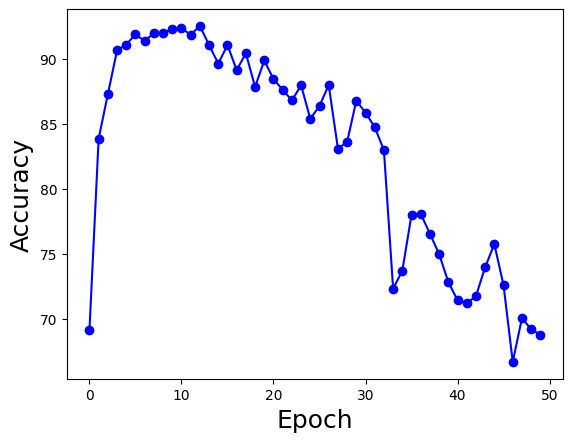

In [10]:
N_EPHOCS=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
train_acc=[69.13,83.87,87.28,90.66,91.11,91.89,91.38,91.98,92.00,92.29,92.36,91.86,92.54,91.07,89.64,91.07,89.14,90.43,87.85,89.88,88.45,87.63,86.81,87.97,85.39,86.39,88.00,83.10,83.61,86.79,85.87,84.75,82.98,72.32,73.71,78.01,78.08,76.56,74.98,72.83,71.44,71.19,71.75,73.98,75.75,72.59,66.69,70.06,69.20,68.78]
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.plot(N_EPHOCS,train_acc,'b-o');
plt.show()

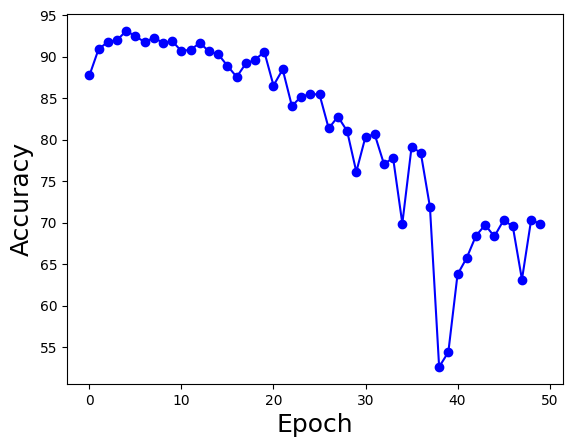

In [13]:
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.plot(N_EPHOCS,ltrain[0:50],'b-o');
plt.show()

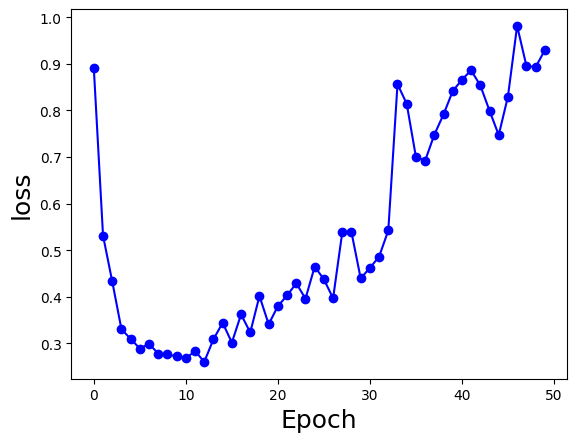

In [14]:
import matplotlib.pyplot as plt
N_EPHOCS=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]
loss=[0.8904,0.5316,0.4332,0.3308,0.3098,0.2892,0.2991,0.2784,0.2764,0.2721,0.2678,0.2841,0.2604,0.3091,0.3443,0.3018,0.3623,0.3236,0.4019,0.3412,0.3802,0.4030,0.4292,0.3961,0.4647,0.4379,0.3968,0.5388,0.5385,0.4396,0.4622,0.4862,0.5425,0.8566,0.8144,0.7005,0.6920,0.7479,0.7914,0.8413,0.8660,0.8862,0.8537,0.7995,0.7472,0.8298,0.9814,0.8964,0.8926,0.9291]
plt.ylabel('loss',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.plot(N_EPHOCS,loss,'b-o');
plt.show()

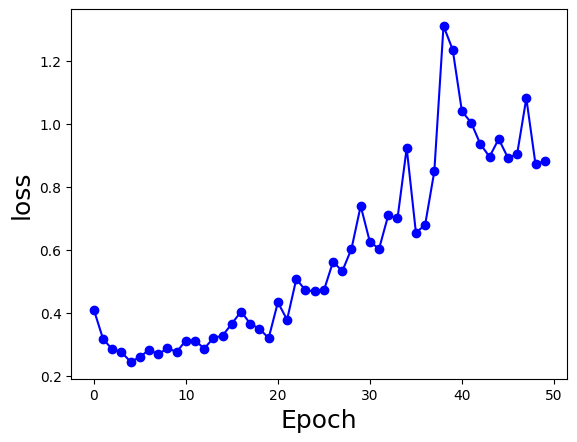

In [16]:
plt.ylabel('loss',fontsize=18)
plt.xlabel('Epoch',fontsize=18)
plt.plot(N_EPHOCS,ltrainloss[0:50],'b-o');
plt.show()